**Exercise 1:**

Plot the beta distribution given by

$$\frac{dP_{(a,b)}}{d\lambda_L}(x) = \frac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)}x^{a-1}(1-x)^{b-1}$$

for at least 4 combinations of (a,b). How do the model parameters change the shape of the density?

/Users/Kilian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in power


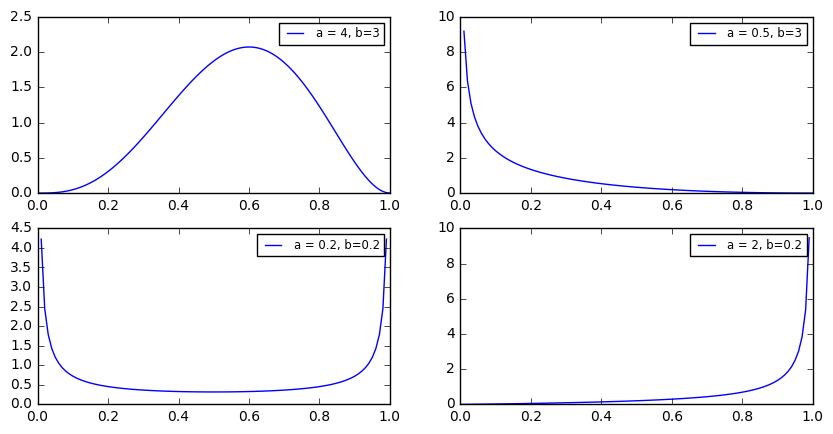

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy.integrate import quad
%matplotlib inline

Beta = lambda a,b: lambda x: gamma(a+b)/(gamma(a)*gamma(b))*x**(a-1)*(1-x)**(b-1)
X = np.arange(0,1.01,0.01)
a = [4,0.5,0.2,2]
b = [3,3,0.2,0.2]
ziped = zip(a,b)
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
ziped2 = zip(ax,ziped)
for e in ziped2:
    e[0].plot(X,Beta(*e[1])(X), label = 'a = {0}, b={1}'.format(*e[1]))
    e[0].legend(loc = 'best', fontsize = 'small')

**Excersie 2:**

We can now interpret the Beta Distribution as a family of distributions for each fixed value of a and b. 
For a random variable X which is distributed with the Beta Distribution calculate

$$(b,a) \to E_{(b,a)}[X]$$

and plot the expectation value as a function of $(b,a)$.

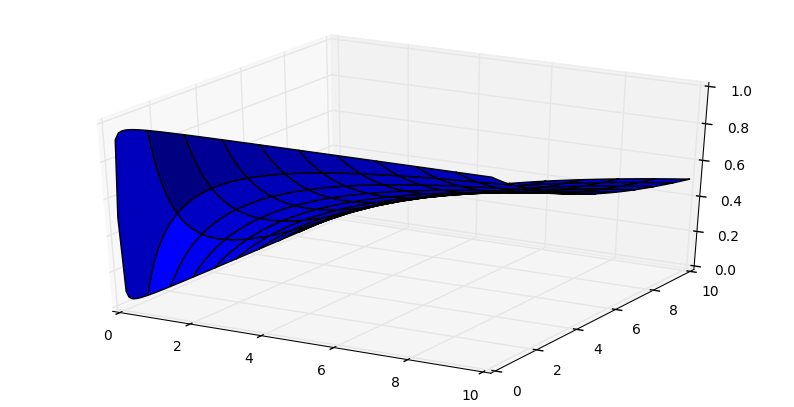

In [10]:
Beta = lambda a,b: lambda x: gamma(a+b)/(gamma(a)*gamma(b))*x**(a-1)*(1-x)**(b-1)
X = np.arange(0,1.01,0.01)
a = [4,0.5,0.2,2]
b = [3,3,0.2,0.2]
ziped = zip(a,b)
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
ziped2 = zip(ax,ziped)
for e in ziped2:
    e[0].plot(X,Beta(*e[1])(X), label = 'a = {0}, b={1}'.format(*e[1]))
    e[0].legend(loc = 'best', fontsize = 'small')

    
betaE = lambda b,a: quad(lambda x: x*Beta(b,a)(x), 0,1)[0]
b = np.linspace(0.01,10, 100)
a = np.linspace(0.01,10, 100)
b, a = np.meshgrid(b,a)
distvec = np.vectorize(betaE)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(b, a, distvec(b, a))

**Exercise 3:**

Create an expression for the variance $$(b,a) \to Var_{(b,a)}[X^2] = E_{(b,a)}[X^2] - (E_{(b,a)}[X])^2$$ and plot the variance as a function of $(b,a)$.

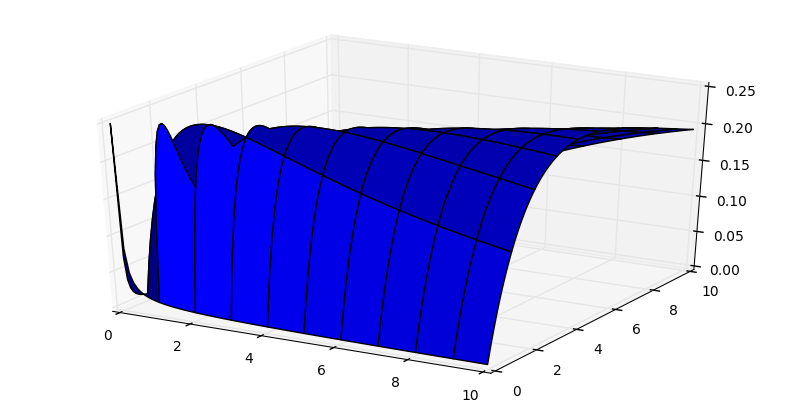

In [12]:
betaE2 = lambda b,a: quad(lambda x: (x**2)*Beta(b,a)(x), 0,1)[0] - (betaE(b,a))**2
b = np.linspace(0.01,10, 100)
a = np.linspace(0.01,10, 100)
b, a = np.meshgrid(b,a)
distvec = np.vectorize(betaE2)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(b, a, distvec(b, a))